## Q2: Time this function for various n e.g. n = 1,2,3.... You should have small values of n all the way up to large values. Plot "time" vs "n" (time on y-axis and n on x-axis). Also, fit a curve to your data, hint it's a polynomial.

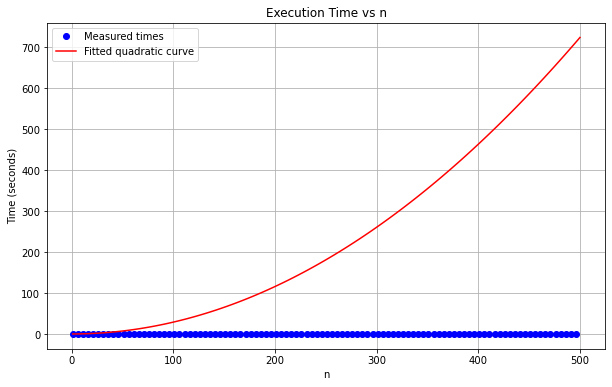

In [22]:

import numpy as np
import time
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

def f(n):
    x = 1
    for i in range(n):
        for j in range(n):
            x += 1
    return x

n_values = np.arange(1, 501, 5)  
times = []

for n in n_values:
    start_time = time.time()  
    f(n)                      
    end_time = time.time()     
    times.append(end_time - start_time)  

coeffs = np.polyfit(n_values, times, 2)  
poly = Polynomial(coeffs)

n_fit = np.linspace(1, 500, 100)  
time_fit = poly(n_fit)

plt.figure(figsize=(10, 6))
plt.plot(n_values, times, 'o', label='Measured times', color='blue')  
plt.plot(n_fit, time_fit, '-', label='Fitted quadratic curve', color='red')  
plt.xlabel('n')  
plt.ylabel('Time (seconds)')  
plt.title('Execution Time vs n')  
plt.legend()  
plt.grid(True)  
plt.show()



# Q4: Find the approximate (eye ball it) location of "n_0" . Do this by zooming in on your plot and indicating on the plot where n_0 is and why you picked this value. Hint: I should see data that does not follow the trend of the polynomial you determined in #2

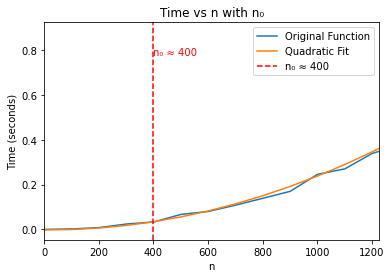

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(n):    
    x = 1
    for i in range(1, n+1):
        for j in range(1, n+1):
            x = x+1
    return x

n_values = range(1, 2000, 100)
times = []

for n in n_values:
    start_time = time.time()  
    f(n)                      
    end_time = time.time()     
    times.append(end_time - start_time)  

quadratic_coefficients = np.polyfit(n_values, times, 2)
fitted_quadratic_curve = np.polyval(quadratic_coefficients, n_values)

plt.plot(n_values, times, label='Original Function') 
plt.plot(n_values, fitted_quadratic_curve, label='Quadratic Fit') 

n_0 = 400
plt.axvline(x=n_0, color='red', linestyle='--', label=f'n₀ ≈ {n_0}')
plt.text(n_0, np.max(times), f'n₀ ≈ {n_0}', color='red', verticalalignment='top')
plt.xlabel('n')
plt.ylabel('Time (seconds)')
plt.title('Time vs n with n₀')
plt.legend()
plt.xlim(0, max(n_values) // 1.55)
plt.show()


# Q5 Will it effect your results from #1

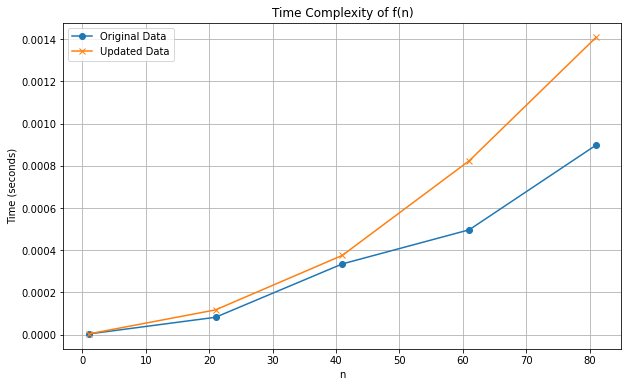

In [20]:
import timeit
import numpy as np
import matplotlib.pyplot as plt

def f_original(n): 
    x = 1
    for i in range(n):
        for j in range(n):
            x += 1
    return x    

def f_updated(n): 
    x = 1
    y = 1
    for i in range(1, n+1):
        for j in range(1, n+1):
            x = x + 1
            y = i + j
    return x    

n_values = range(1, 100, 20)
original_times = []
new_times = []

for n in n_values:
    timer = timeit.Timer(lambda: f_original(n))
    time_taken = timer.timeit(number=10) / 10
    original_times.append(time_taken)

for n in n_values:
    timer = timeit.Timer(lambda: f_updated(n))
    new_time = timer.timeit(number=10) / 10
    new_times.append(new_time)

plt.figure(figsize=(10,6))
plt.plot(n_values, original_times, label='Original Data', marker='o')
plt.plot(n_values, new_times, label='Updated Data', marker='x')
plt.xlabel('n')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of f(n)')
plt.grid(True)
plt.legend()
plt.show()



# Q6 Implement merge sort, upload your code to github and show/test it on the array [5,2,4,7,1,3,2,6].

In [21]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2

        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1


arr = [5, 2, 4, 7, 1, 3, 2, 6]
merge_sort(arr)
print("Sorted array is:", arr)


Sorted array is: [1, 2, 2, 3, 4, 5, 6, 7]
